In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/train-images.idx3-ubyte
/kaggle/input/t10k-labels.idx1-ubyte
/kaggle/input/t10k-images.idx3-ubyte
/kaggle/input/train-labels.idx1-ubyte
/kaggle/input/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte
/kaggle/input/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte
/kaggle/input/train-labels-idx1-ubyte/train-labels-idx1-ubyte
/kaggle/input/train-images-idx3-ubyte/train-images-idx3-ubyte


In [2]:
train_images_path = '/kaggle/input/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels_path = '/kaggle/input/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images_path = '/kaggle/input/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels_path = '/kaggle/input/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

In [3]:
import keras
import tensorflow as tf
import time
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, ReLU, Add, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model

In [4]:
import numpy as np
import struct

def load_mnist_images(filename):
    with open(filename, 'rb') as f:
        magic, num, rows, cols = struct.unpack('>IIII', f.read(16))
        images = np.fromfile(f, dtype=np.uint8).reshape(num, rows, cols)
        return images / 255.0  # Normalize pixel values to [0, 1]

def load_mnist_labels(filename):
    with open(filename, 'rb') as f:
        magic, num = struct.unpack('>II', f.read(8))
        labels = np.fromfile(f, dtype=np.uint8)
        return labels

# Load training and testing data
X_train = load_mnist_images(train_images_path)
y_train = load_mnist_labels(train_labels_path)
X_test = load_mnist_images(test_images_path)
y_test = load_mnist_labels(test_labels_path)


In [5]:
print(f"x_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print(f"x_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")


x_train: (60000, 28, 28)
y_train: (60000,)
x_test: (10000, 28, 28)
y_test: (10000,)


In [6]:
X_train = X_train.astype('float32')  / 255.0
X_test = X_test.astype('float32')  / 255.0

# Create the MLP Model

In [7]:
# Flatten the images from 28x28 dimensions and normalize them
X_train = X_train.reshape((X_train.shape[0], 28 * 28))
X_test = X_test.reshape((X_test.shape[0], 28 * 28))

print("x_train : ",X_train.shape)
print("y_train : ",y_train.shape)
print("x_test  : ",X_test.shape)
print("y_test  : ",y_test.shape)

x_train :  (60000, 784)
y_train :  (60000,)
x_test  :  (10000, 784)
y_test  :  (10000,)


In [8]:
# Define the model
model0 = Sequential()

# Input layer
# Define the input layer with the shape corresponding to flattened 28x28 images
model0.add(tf.keras.layers.Input(shape=(28 * 28,)))

# Add the hidden layer with 32 units and ReLU activation function
model0.add(tf.keras.layers.Dense(32, activation='relu'))

# Add a dropout layer with a rate of 0.3 to reduce overfitting during training
model0.add(tf.keras.layers.Dropout(0.3))

# Output layer: Using softmax activation for multi-class classification.
model0.add(tf.keras.layers.Dense(10, activation='softmax'))

In [9]:
# Summary of the model
model0.summary()

model0.compile(optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 32)             │        25,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 25,450 (99.41 KB)

 Trainable params: 25,450 (99.41 KB)

 Non-trainable params: 0 (0.00 B)

In [10]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

import os

if os.path.exists("Best_points.keras"):
    os.remove("Best_points.keras")

MCP = ModelCheckpoint('Best_points.keras', verbose=1, save_best_only=True, monitor='val_accuracy', mode='max')

In [11]:
batch_size  = 32
epochs      = 200

start_time0 = time.time()
history0 = model0.fit(  X_train, y_train,
                      batch_size      = batch_size,
                      epochs          = epochs,
                      
                      validation_data = (X_test, y_test),callbacks=MCP)
stop_time0 = time.time()

# Calculate elapsed time
elapsed_time0 = stop_time0 - start_time0
minutes0 = int(elapsed_time0 // 60)
seconds0 = int(elapsed_time0 % 60)

# Print time used in minutes and seconds
print(f'training_time0 = {minutes0} min {seconds0} sec')

Epoch 1/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1114 - loss: 2.3015
Epoch 1: val_accuracy improved from -inf to 0.11350, saving model to Best_points.keras
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1114 - loss: 2.3015 - val_accuracy: 0.1135 - val_loss: 2.3004
Epoch 2/200
1850/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1105 - loss: 2.3007
Epoch 2: val_accuracy did not improve from 0.11350
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1106 - loss: 2.3007 - val_accuracy: 0.1135 - val_loss: 2.3002
Epoch 3/200
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.1134 - loss: 2.3002
Epoch 3: val_accuracy did not improve from 0.11350
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1134 - loss: 2.3002 - val_accuracy: 0.1135 - val_loss: 2.3001
Epoch 4/200
1871/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.1155 - loss: 2.2999
Epoch 4: val_accuracy did not improve from 0.11350
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - ac

In [12]:
from tensorflow.keras.models import load_model

# Load the best saved model
best_model = load_model('Best_points.keras')

# Evaluate the model on the test dataset
score = best_model.evaluate(X_test, y_test, verbose=0)

# Print the evaluation results
print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.9099
Test accuracy : 0.7692


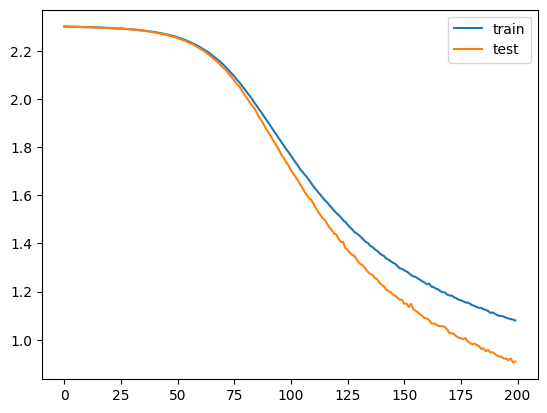

In [13]:
plt.plot(history0.history['loss'], label='train')
plt.plot(history0.history['val_loss'], label='test')
plt.legend()

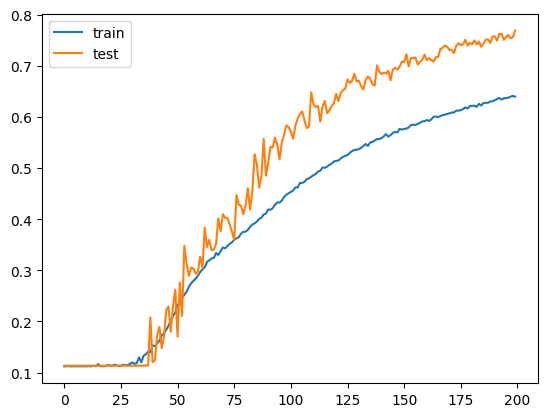

In [14]:
plt.plot(history0.history['accuracy'], label='train')
plt.plot(history0.history['val_accuracy'], label='test')
plt.legend()